In [58]:
!pip install pmdarima

# All Imports

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima



# Data Download

In [60]:
sales_df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv')

In [61]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [62]:
sales_df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [63]:
sales_df['date'] = pd.to_datetime(sales_df.date)

In [64]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    366 non-null    datetime64[ns]
 1   sales   366 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [65]:
sales_df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


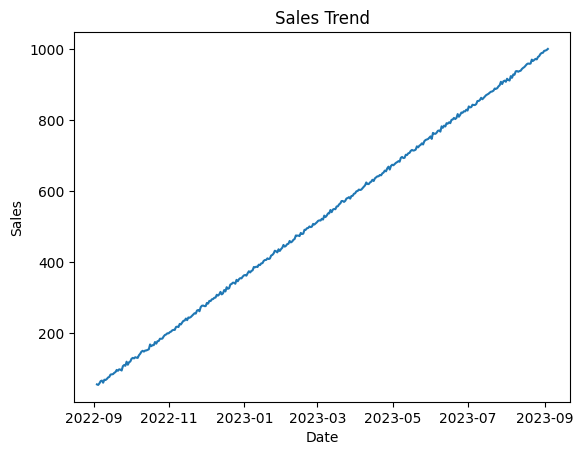

In [66]:
sns.lineplot(x='date', y='sales', data=sales_df)

plt.title('Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [67]:
def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(sales_df.sales)

Dickey-Fuller test results:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

In [68]:
stationary_sales_df = sales_df.diff().dropna()

test_stationarity(stationary_sales_df.sales)

Dickey-Fuller test results:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

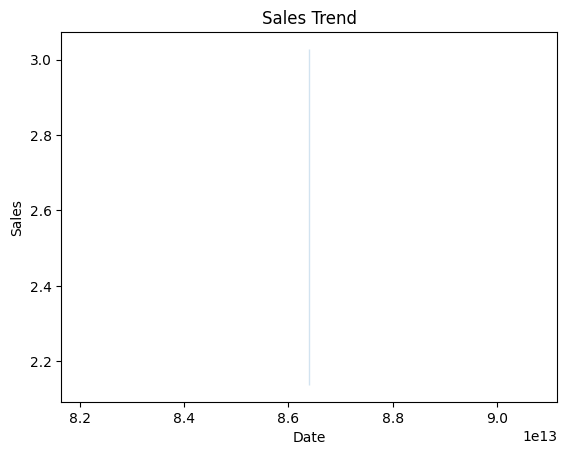

In [69]:
sns.lineplot(x='date', y='sales', data=stationary_sales_df)

plt.title('Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [70]:
decomposition = seasonal_decompose(sales_df.sales, period = 12)
decomposition

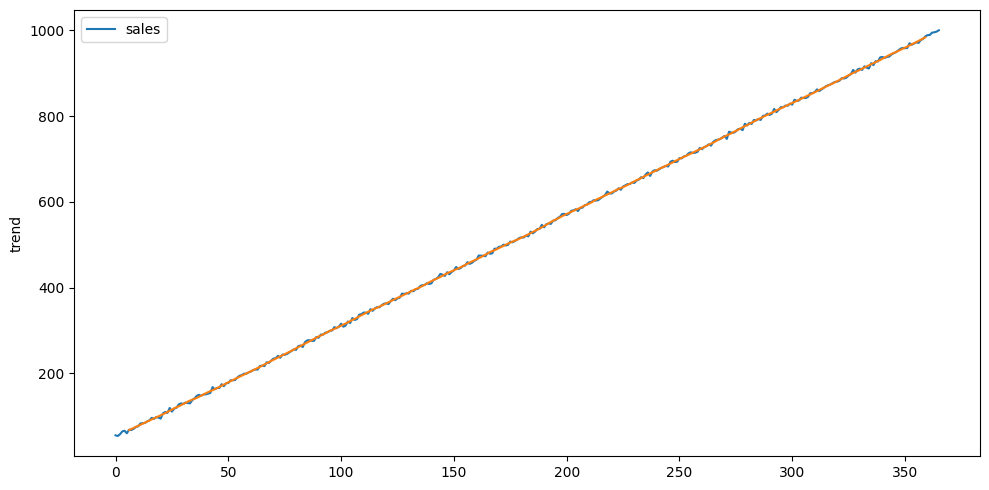

In [71]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = sales_df)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

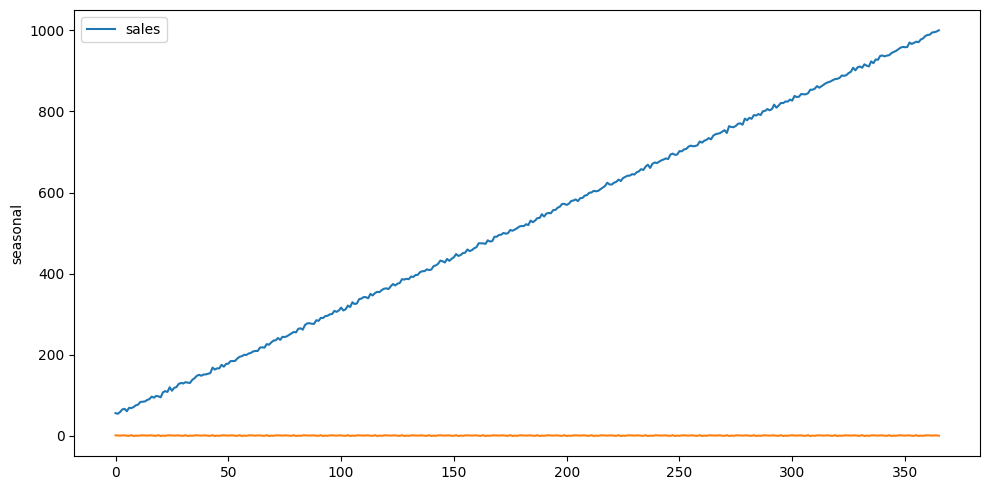

In [72]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = sales_df)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

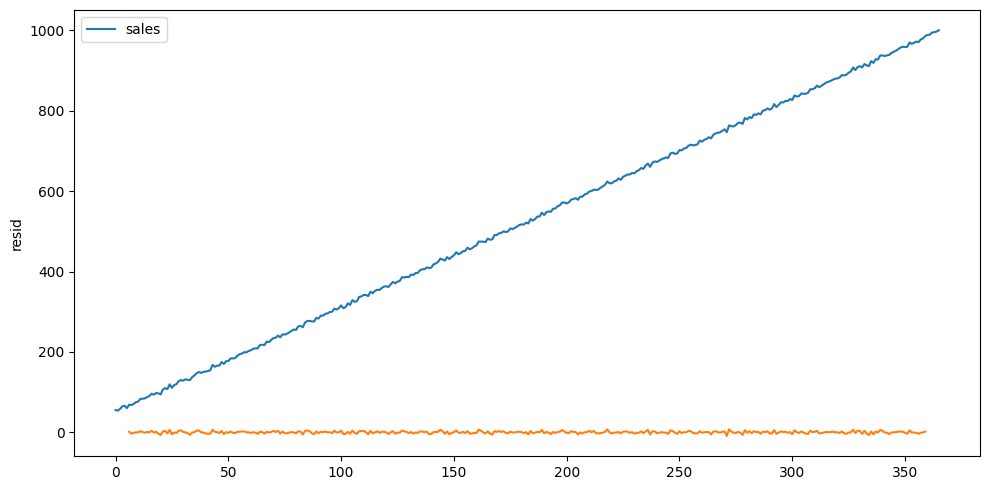

In [73]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = sales_df)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

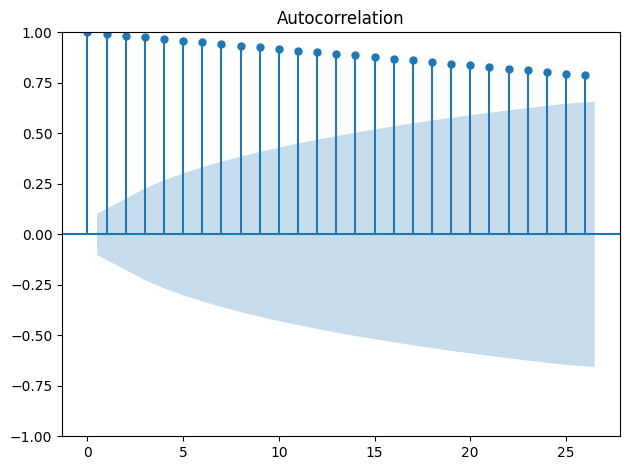

In [74]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(sales_df.sales)

plt.tight_layout()

plt.show()

In [75]:
model = auto_arima(sales_df.sales, seasonal = False, trace = True, m = 10)

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (10) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1843.274, Time=2.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2096.542, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.972, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1839.586, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.657, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1839.552, Time=1.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1841.532, Time=2.77 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1843.586, Time=1.66 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1839.607, Time=1.33 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1922.648, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=1.32 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 11.632 seconds


In [77]:
forecast = model.predict(12)
print(forecast)

366    1002.158148
367    1004.831669
368    1007.423289
369    1010.021630
370    1012.619419
371    1015.217254
372    1017.815084
373    1020.412915
374    1023.010746
375    1025.608577
376    1028.206409
377    1030.804240
dtype: float64


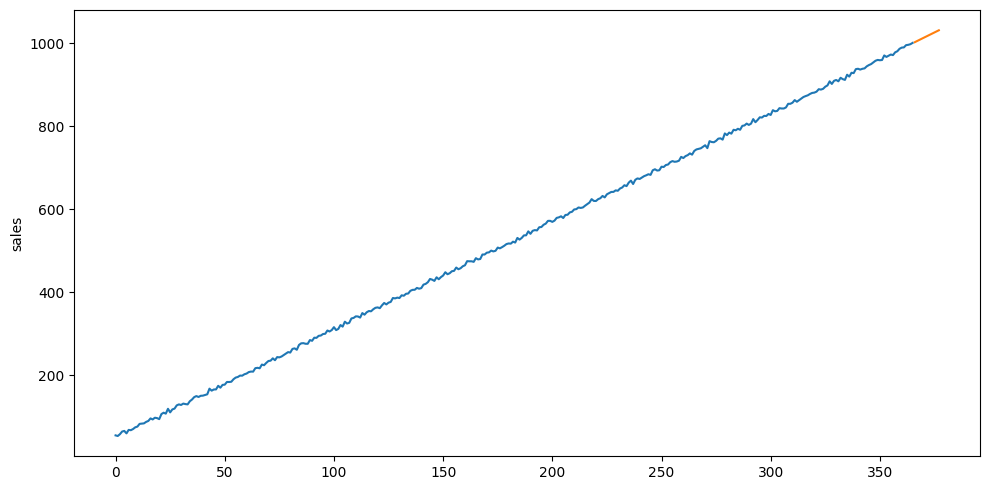

In [79]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = sales_df.sales)
sns.lineplot(data = forecast)

plt.tight_layout()

plt.show()